In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [26]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,En la hacienda,1922
1,Unruhige Nacht,1958
2,Dissonance (II),2008
3,Self Intervention,2010
4,Ate,2008


In [27]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

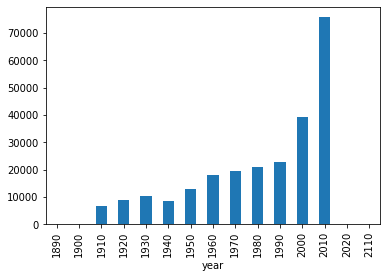

In [28]:
t = titles
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

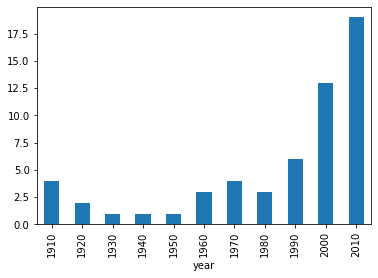

In [29]:
t = titles
t = t[t.title.str.contains('Hamlet')]
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [17]:
c = cast
c = c[c.year // 10 * 10 == 1950]
c.groupby('type').character.count()

type
actor      157738
actress     57733
Name: character, dtype: int64

In [80]:
# From video
c = cast
c = c.groupby([c.year // 10 * 10, 'type']).size()
c.unstack(1)

type,actor,actress
year,,
1890,2,1
1900,54,16
1910,27605,15830
1920,48726,24075
1930,151290,49972
1940,162364,51795
1950,157738,57733
1960,134605,57744
1970,152811,66974


### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [30]:
c = cast
c = c[(c.year // 10 * 10 == 1950) & (1 <= c.n) & (c.n <= 5)]
c.groupby(['n', 'type']).size()

n    type   
1.0  actor      6692
     actress    3040
2.0  actor      4640
     actress    4635
3.0  actor      5654
     actress    3201
4.0  actor      5663
     actress    2881
5.0  actor      5674
     actress    2592
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [35]:
c = cast
c = c[c.title.str.contains('Pink Panther')]
c.groupby(c.title).size().sort_values(ascending=False)

title
The Pink Panther                  111
The Pink Panther 2                 84
The Pink Panther Strikes Again     70
Revenge of the Pink Panther        68
Curse of the Pink Panther          67
Son of the Pink Panther            46
Trail of the Pink Panther          41
The Return of the Pink Panther     30
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [76]:
c = cast
c = c[c.name == 'Frank Oz']
c = c.groupby([c.year, c.title]).size()
c = c[c > 1].sort_index(level='year', ascending=True)
c

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [49]:
c = cast
c = c[c.name == 'Frank Oz']
c = c.groupby(c.character).character.count()
c = c[c >= 2].sort_values(ascending=False)
c

character
Yoda              6
Miss Piggy        6
Animal            6
Sam the Eagle     5
Cookie Monster    5
Fozzie Bear       4
Bert              3
Grover            2
Name: character, dtype: int64